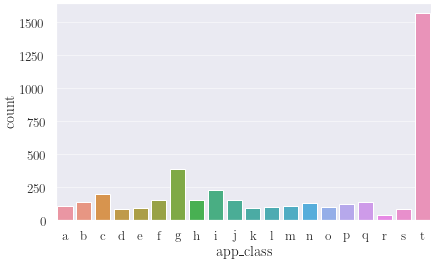

In [27]:
# 载入套件
from typing import Dict
import numpy as np
import pandas as pd

import ydata_profiling
import scienceplots
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
# matplotlib.use('pdf')

pd.plotting.register_matplotlib_converters()
plt.style.use(['fivethirtyeight', 'science', 'grid'])
sns.set(
    # rc={'text.usetex': True},
    font="serif",
    font_scale=1.2
)

%matplotlib inline
app = pd.read_csv('../Datasets/app_class.csv',
                  header=None)
app.columns = ['appid', 'app_class']
sns.countplot(x=app['app_class'])
plt.show()

day: Dict[int, pd.DataFrame] = {}
day[1] = pd.read_csv('../Datasets/day01.txt', header=None)
day[1].columns = ['uid', 'appid', 'app_type', 'start_day', 'start_time',
                  'end_day', 'end_time', 'duration', 'up_flow', 'down_flow']
day[1] = day[1].merge(app, on='appid', how='left')


In [28]:
day[1].isna().sum().sort_values()


uid                 0
appid               0
app_type            0
start_day           0
start_time          0
end_day             0
end_time            0
duration            0
up_flow             0
down_flow           0
app_class     2682179
dtype: int64

In [35]:
day[1][(day[1]['uid'] == 'BB1657CFD3B4B7208674BEB7D26014B2') & (day[1]['app_class'] == 'a')].head(200)


,uid,appid,app_type,start_day,start_time,end_day,end_time,duration,up_flow,down_flow,app_class
2,BB1657CFD3B4B7208674BEB7D26014B2,4803,usr,1,13:40:45,1,13:44:41,235,3304,5851,a
3,BB1657CFD3B4B7208674BEB7D26014B2,4803,usr,1,13:47:10,1,13:47:22,12,398,268,a
4,BB1657CFD3B4B7208674BEB7D26014B2,4803,usr,1,13:47:23,1,13:50:10,167,63044,34622,a
5,BB1657CFD3B4B7208674BEB7D26014B2,4803,usr,1,14:19:25,1,14:19:42,17,0,0,a
7,BB1657CFD3B4B7208674BEB7D26014B2,4803,usr,1,14:20:20,1,14:24:55,275,577961,78443,a
...,...,...,...,...,...,...,...,...,...,...,...
429721,BB1657CFD3B4B7208674BEB7D26014B2,17142,usr,1,23:23:31,1,23:48:46,1515,13224573,404908,a
693993,BB1657CFD3B4B7208674BEB7D26014B2,20858,usr,1,20:35:19,1,20:36:25,65,0,0,a
693994,BB1657CFD3B4B7208674BEB7D26014B2,20858,usr,1,20:38:02,1,20:39:18,75,82991,12766,a
697380,BB1657CFD3B4B7208674BEB7D26014B2,20858,usr,1,20:35:19,1,20:36:25,65,0,0,a


# 任务1：聚类分析

## 任务1.1

**根据用户常用所属的20类APP的数据对用户进行聚类**，要求至少给出三种不同的聚类算法进行比较，选择合理的聚类数量K值，并分析聚类结果。

## 任务1.2

根据聚类结果对不同类别的用户画像，并且**分析不同群体用户的特征**。（用户画像定义：根据用户的属性，偏好，行为习惯等信息对用户打标签，用以描述不同群体的用户行为，从而针对不同群体的用户推荐不同所属类别的APP产品。）

# 任务2

APP使用情况预测分析：要研究的问题是通过用户的APP使用记录预测用户未来是否使用APP（分类问题）及使用时长（回归问题）

## 任务2.1：二元分类
对用户使用APP的情况进行预测，根据用户第1~11天的a类APP的使用情况，来预测用户在第12~21天**是否会使用**该类APP。给出预测结果和真实结果相比的准确率。（注：测试集不能参与到训练和验证中，否则作违规处理）

## 任务2.2：回归问题
对用户使用APP的情况进行预测，根据用户第1~11天的a类APP的使用情况，来预测第12~21天用户使用a类APP的**有效日均使用时长**。评价指标选用NMSE。